In [1]:
import pandas as pd

In [ ]:
teams =pd.read_csv("teams_csv.csv")
teams = teams [["team", "country", "year", "athletes", "prev_medals", "medals"]]
teams.head()

,team,country,year,athletes,prev_medals,medals
0,AFG,Afghanistan,1964,8,0.0,0
1,AFG,Afghanistan,1968,5,0.0,0
2,AFG,Afghanistan,1972,8,0.0,0
3,AFG,Afghanistan,1980,11,0.0,0
4,AFG,Afghanistan,2004,5,0.0,0


the following code is to add host as a dummy variable showing 1 if the country hosted else 0


In [ ]:
host_countries =  pd.read_csv('host_countries_cleaned.csv')

# Merge 'teams' and 'filtered_df' based on matching country and year
merged = pd.merge(teams, host_countries, left_on=['country', 'year'], right_on=['game_location', 'game_year'], how='left')

# Create 'host' column and fill with 1 for matches, 0 otherwise
merged['host'] = merged['game_location'].notnull().astype(int)

# If there's any mismatch or NaN, fill 'host' column with 0
merged['host'].fillna(0, inplace=True)

# Update 'teams' DataFrame with the 'host' column
teams['host'] = merged['host']

teams


,team,country,year,athletes,prev_medals,medals,host
0,AFG,Afghanistan,1964,8,0.0,0,0
1,AFG,Afghanistan,1968,5,0.0,0,0
2,AFG,Afghanistan,1972,8,0.0,0,0
3,AFG,Afghanistan,1980,11,0.0,0,0
4,AFG,Afghanistan,2004,5,0.0,0,0
...,...,...,...,...,...,...,...
2523,NRU,Nauru,2024,2,0.0,0,0
2524,NaN,Somalia,2024,2,0.0,0,0
2525,SKN,Saint Kitts and Nevis,2024,6,0.0,0,0
2526,SSD,South Sudan,2024,12,0.0,0,0


Prev_medals is the number of medals won in the last olympics

Athletes is the number of athletes sent for the current olympics

Host is 1 if the country is the host, 0 otherwise

As the nb of medals changes over time we can put everything as percentages of the year they are competing in

In [ ]:
# Step 1: Compute the total number of medals/athletes/previous medals won in each year
teams['total_medals_year'] = teams.groupby('year')['medals'].transform('sum')
teams['total_athletes_year'] = teams.groupby('year')['athletes'].transform('sum')
teams['total_prev_medals_year'] = teams.groupby('year')['prev_medals'].transform('sum')


# Step 2: Add a new column for the percentage of medals won (sam for athletes sent and previous medals won)
teams['percentage_medals_won_year'] = teams['medals'] / teams['total_medals_year'] * 100
teams['percentage_athletes_sent'] = teams['athletes'] / teams['total_athletes_year'] * 100
teams['percentage_prev_medals'] = teams['prev_medals'] / teams['total_prev_medals_year'] * 100


#Also we square this percentage as the relation ship between the % of athletes has an exponential relationship with the percetnage of medals won
teams['percentage_athletes_sent_sqrd'] = teams['percentage_athletes_sent'] * teams['percentage_athletes_sent']


# Set the percentage to 0 for the year 2024 this is do to the forecast
teams.loc[teams['year'] == 2024, 'percentage_medals_won_year'] = 0
teams.loc[teams['year'] == 2024, 'total_medals_year'] = 1080

teams = teams [["team", "country", "year", "percentage_athletes_sent", "percentage_athletes_sent_sqrd",  "percentage_prev_medals", "percentage_medals_won_year" ,"host", "total_medals_year", "medals"]]

# Display the updated DataFrame
teams[teams["team"] == "USA"]


,team,country,year,percentage_athletes_sent,percentage_athletes_sent_sqrd,percentage_prev_medals,percentage_medals_won_year,host,total_medals_year,medals
2016,USA,United States,1964,6.408753,41.072120,13.858093,16.423712,0,1029,169
2017,USA,United States,1968,6.170535,38.075507,18.490153,15.704825,0,1057,166
2018,USA,United States,1972,5.616558,31.545726,15.704825,14.085667,0,1214,171
2019,USA,United States,1976,6.414264,41.142785,14.297659,12.424242,0,1320,164
2020,USA,United States,1984,7.354346,54.086401,21.779548,23.848238,1,1476,352
2021,USA,United States,1988,5.951390,35.419043,14.426230,13.092979,0,1581,207
2022,USA,United States,1992,5.963116,35.558757,19.184430,15.013405,0,1492,224
2023,USA,United States,1996,6.100044,37.210532,14.983278,14.060803,1,1842,259
2024,USA,United States,2000,5.539042,30.680981,14.037940,12.075848,0,2004,242
2025,USA,United States,2004,5.403394,29.196665,12.075848,13.143428,0,2001,263


"percentage_athletes_sent", "percentage_prev_medals", "percentage_medals_won_year" represent the percentages for a specific olympics

In [ ]:
# Select all relevant columns for correlation
selected_columns = ['percentage_athletes_sent', 'percentage_athletes_sent_sqrd', 'percentage_prev_medals', 'host', 'total_medals_year', 'medals', 'percentage_medals_won_year']

# Filter the DataFrame with selected columns
numeric_columns_with_host = teams[selected_columns]

# Calculate the correlation between "percentage_medals_won_year" and other numeric columns, including "host"
correlation_with_host = numeric_columns_with_host.corr()['percentage_medals_won_year']
print(correlation_with_host)



percentage_athletes_sent         0.811636
percentage_athletes_sent_sqrd    0.885101
percentage_prev_medals           0.926835
host                             0.216204
total_medals_year               -0.038634
medals                           0.972603
percentage_medals_won_year       1.000000
Name: percentage_medals_won_year, dtype: float64


We can see strong corr coeffs between medals and previous medals & athletes we could use those columns to make predictions

In [ ]:
import seaborn as sns

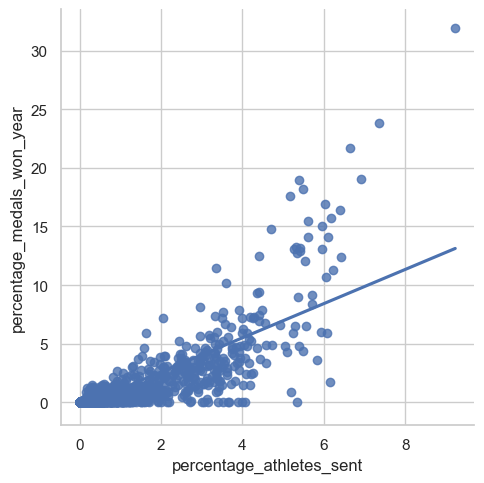

In [ ]:
sns.lmplot(x="percentage_athletes_sent", y= "percentage_medals_won_year", data = teams, fit_reg= True, ci=None)

There the relationship between the percentage and athletes sent and percentage of medals won is not completely linear, also, the correlation between the atheletes and the medals is 0.81 while the squarred of the athletes and the medals is 0,88, suggesting that the linear relationship is not the best fit for these 2 variables

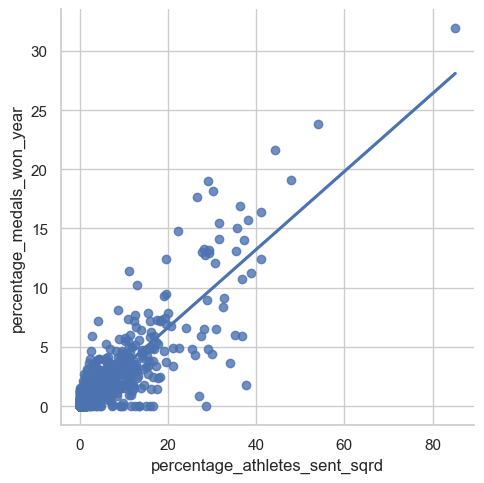

In [ ]:
sns.lmplot(x="percentage_athletes_sent_sqrd", y= "percentage_medals_won_year", data = teams, fit_reg= True, ci=None)

We can see vidually that it is already more linear than the non squarred version

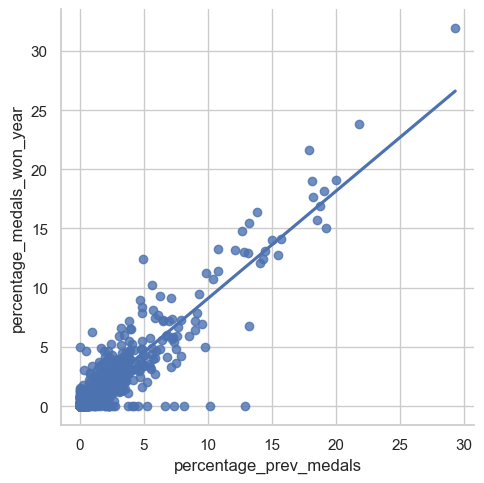

In [ ]:
sns.lmplot(x="percentage_prev_medals", y= "percentage_medals_won_year", data = teams, fit_reg= True, ci=None)

also looks kind of linear, good for us :)

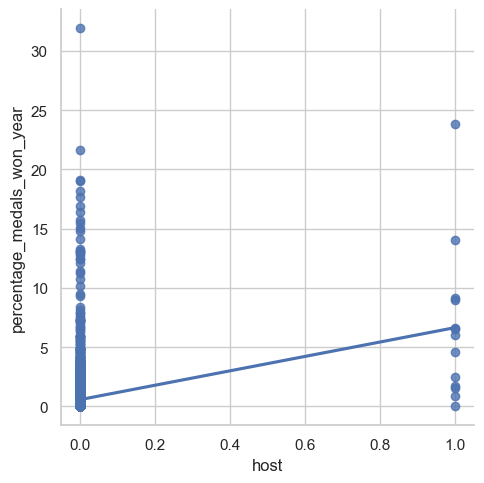

In [ ]:
sns.lmplot(x="host", y= "percentage_medals_won_year", data = teams, fit_reg= True, ci=None)

As host is a dummy variable the relationship is not defined similarly as a continuous to continuous


Imbalanced dummy variables can affect the performance of your model, particularly if the minority class is of interest.
Solution: Depending on your goals, you may need to use techniques to handle class imbalance, such as adjusting class weights in the model or using resampling methods (oversampling the minority class or undersampling the majority class).


Data cleaning now

In [ ]:
#looking for missing values
teams[teams.isnull().any(axis=1)]

,team,country,year,percentage_athletes_sent,percentage_athletes_sent_sqrd,percentage_prev_medals,percentage_medals_won_year,host,total_medals_year,medals
8,ALB,Albania,1992,0.073117,0.005346,NaN,0.0,0,1492,0
15,ALG,Algeria,1964,0.091181,0.008314,NaN,0.0,0,1029,0
28,AND,Andorra,1976,0.034734,0.001206,NaN,0.0,0,1320,0
39,ANG,Angola,1980,0.237663,0.056483,NaN,0.0,0,1384,0
48,ANT,Antigua and Barbuda,1976,0.196828,0.038741,NaN,0.0,0,1320,0
...,...,...,...,...,...,...,...,...,...,...
2505,NaN,Liberia,2024,0.023779,0.000565,0.0,0.0,0,1080,0
2508,NaN,Republic of the Congo,2024,0.023779,0.000565,0.0,0.0,0,1080,0
2510,NaN,São Tomé and Príncipe,2024,0.023779,0.000565,0.0,0.0,0,1080,0
2517,NaN,Brunei,2024,0.015853,0.000251,0.0,0.0,0,1080,0


all of the missing values result from the fact that these countries did not participate in the previous olympics, we can drop them as they don't seem to win any medals anyway (stop polluting our data set losers) also some missing values concerning the prefix of some countries (we could add those)

In [ ]:
#removing NaN values
teams=teams.dropna()
teams.head()

,team,country,year,percentage_athletes_sent,percentage_athletes_sent_sqrd,percentage_prev_medals,percentage_medals_won_year,host,total_medals_year,medals
0,AFG,Afghanistan,1964,0.104207,0.010859,0.0,0.0,0,1029,0
1,AFG,Afghanistan,1968,0.058323,0.003402,0.0,0.0,0,1057,0
2,AFG,Afghanistan,1972,0.077738,0.006043,0.0,0.0,0,1214,0
3,AFG,Afghanistan,1980,0.153782,0.023649,0.0,0.0,0,1384,0
4,AFG,Afghanistan,2004,0.037213,0.001385,0.0,0.0,0,2001,0


now we split the data between past 2016 for training, we keep 2016 and 2021 for testing and forecast 2024, we also create a new dataframe errors to plot the errors and to do time series analysis

In [ ]:
train = teams[teams["year"] < 2016 ].copy()
test = teams[(teams["year"] >= 2016) & (teams["year"] < 2024)].copy()
pred = teams[teams["year"] > 2021 ].copy()
errors = teams[(teams["year"] < 2024)].copy()

print(f'train has shape {train.shape}')
print(f'test has shape {test.shape}')
print(f'countries of 2024 has shape {pred.shape}')

train has shape (1792, 10)
test has shape (393, 10)
countries of 2024 has shape (194, 10)


good, is like a 80/20 split btwn train and test :)

Now time for a linear regression

In [ ]:
import statsmodels.api as sm

# Assuming you have your data in a pandas DataFrame
predictors = ["percentage_athletes_sent_sqrd", "percentage_prev_medals", "host"]
target = "percentage_medals_won_year"

# Create the model
model = sm.OLS(train[target], train[predictors])

# Fit the linear regression model using StatsModels
results = model.fit()

# Get the regression summary
summary = results.summary()
print(summary)


                                     OLS Regression Results                                    
Dep. Variable:     percentage_medals_won_year   R-squared (uncentered):                   0.936
Model:                                    OLS   Adj. R-squared (uncentered):              0.936
Method:                         Least Squares   F-statistic:                              8774.
Date:                        Thu, 23 Nov 2023   Prob (F-statistic):                        0.00
Time:                                12:32:46   Log-Likelihood:                         -1617.5
No. Observations:                        1792   AIC:                                      3241.
Df Residuals:                            1789   BIC:                                      3257.
Df Model:                                   3                                                  
Covariance Type:                    nonrobust                                                  
                                    coef

We can see R squared is 0.925! also the t-value of our predictors are 0 meaning they are highly significant

for every % of athlete sent, it increases by 0.24% of percentage_medals_won_year

for every % of previous medal won, it brings 0.8355% of the percentage_medals_won_year


In [ ]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
predictors = ["percentage_athletes_sent_sqrd", "percentage_prev_medals", "host"]
target = "percentage_medals_won_year"
reg.fit(train[predictors], train ["percentage_medals_won_year"])

LinearRegression()

In the next step we compute our predicted percentage with the total number of medals of that year (bc we predict medals not percentages)

In [ ]:
predictions = reg.predict(test[predictors])
test["predictions"] = predictions / 100 * test["total_medals_year"]
test


,team,country,year,percentage_athletes_sent,percentage_athletes_sent_sqrd,percentage_prev_medals,percentage_medals_won_year,host,total_medals_year,medals,predictions
7,AFG,Afghanistan,2016,0.021951,0.000482,0.051546,0.000000,0,2023,0,0.701153
14,ALB,Albania,2016,0.043901,0.001927,0.000000,0.000000,0,2023,0,-0.036305
27,ALG,Algeria,2016,0.541450,0.293168,0.051546,0.098863,0,2023,2,1.308443
38,AND,Andorra,2016,0.029268,0.000857,0.000000,0.000000,0,2023,0,-0.038526
47,ANG,Angola,2016,0.190239,0.036191,0.000000,0.000000,0,2023,0,0.034788
...,...,...,...,...,...,...,...,...,...,...,...
2317,MTN,Mauritania,2021,0.017669,0.000312,0.000000,0.000000,0,2099,0,-0.041146
2318,NRU,Nauru,2021,0.017669,0.000312,0.000000,0.000000,0,2099,0,-0.041146
2320,SKN,Saint Kitts and Nevis,2021,0.017669,0.000312,0.000000,0.000000,0,2099,0,-0.041146
2321,SSD,South Sudan,2021,0.017669,0.000312,0.000000,0.000000,0,2099,0,-0.041146


we don't want negative values in our predictions & also round them

In [ ]:
test.loc[test["predictions"] < 0, "predictions"] = 0
test["predictions"] = test["predictions"].round()
test

,team,country,year,percentage_athletes_sent,percentage_athletes_sent_sqrd,percentage_prev_medals,percentage_medals_won_year,host,total_medals_year,medals,predictions
7,AFG,Afghanistan,2016,0.021951,0.000482,0.051546,0.000000,0,2023,0,1.0
14,ALB,Albania,2016,0.043901,0.001927,0.000000,0.000000,0,2023,0,0.0
27,ALG,Algeria,2016,0.541450,0.293168,0.051546,0.098863,0,2023,2,1.0
38,AND,Andorra,2016,0.029268,0.000857,0.000000,0.000000,0,2023,0,0.0
47,ANG,Angola,2016,0.190239,0.036191,0.000000,0.000000,0,2023,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2317,MTN,Mauritania,2021,0.017669,0.000312,0.000000,0.000000,0,2099,0,0.0
2318,NRU,Nauru,2021,0.017669,0.000312,0.000000,0.000000,0,2099,0,0.0
2320,SKN,Saint Kitts and Nevis,2021,0.017669,0.000312,0.000000,0.000000,0,2099,0,0.0
2321,SSD,South Sudan,2021,0.017669,0.000312,0.000000,0.000000,0,2099,0,0.0


In [ ]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test["medals"], test ["predictions"])
error

3.8040712468193383

In [ ]:
teams.describe()["medals"]

count    2379.000000
mean       10.185372
std        32.591898
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max       442.000000
Name: medals, dtype: float64

Mean absolute error (3.8) lower than the std of medals (32) it means that, on average, the model's predictions are closer to the actual values than the variability inherent in the medal's data itself.

lets now check for a particular team (USA)

In [ ]:
test[test["team"] == "IRL"]

,team,country,year,percentage_athletes_sent,percentage_athletes_sent_sqrd,percentage_prev_medals,percentage_medals_won_year,host,total_medals_year,medals,predictions,absolute_errors
912,IRL,Ireland,2016,0.680471,0.463041,0.257732,0.148295,0,2023,3,5.0,-2.0
2143,IRL,Ireland,2021,1.024826,1.050267,0.148957,0.190567,0,2099,4,4.0,0.0


pretty close
and Switzerland ?

In [ ]:
test[test["team"]== "SUI"]

,team,country,year,percentage_athletes_sent,percentage_athletes_sent_sqrd,percentage_prev_medals,percentage_medals_won_year,host,total_medals_year,medals,predictions
1794,SUI,Switzerland-1,2016,1.112168,1.236918,0.206186,0.543747,0,2023,11,5.0
2146,SUI,Switzerland,2021,0.945313,0.893617,0.546177,0.619343,0,2099,13,10.0


In [ ]:
test[test["team"]== "IND"]

,team,country,year,percentage_athletes_sent,percentage_athletes_sent_sqrd,percentage_prev_medals,percentage_medals_won_year,host,total_medals_year,medals,predictions
882,IND,India,2016,0.951196,0.904774,0.309278,0.098863,0,2023,2,6.0
2141,IND,India,2021,1.077834,1.161726,0.099305,0.333492,0,2099,7,4.0


lets look at the error by country

In [ ]:
# Calculate the absolute errors between predictions and actual medals
test['absolute_errors'] = (test['medals'] - test['predictions']).abs()

# Display the updated DataFrame with the absolute errors column
print(test[test['team'].isin(["SUI", "NZL", "FRA", "USA", "ITA", "GER"])][['team', 'year', 'medals', 'predictions', 'absolute_errors']])


     team  year  medals  predictions  absolute_errors
655   FRA  2016      96         90.0              6.0
731   GER  2016     159        101.0             58.0
977   ITA  2016      72         68.0              4.0
1459  NZL  2016      36         26.0             10.0
1794  SUI  2016      11          5.0              6.0
2028  USA  2016     264        241.0             23.0
2118  USA  2021     271        258.0             13.0
2121  GER  2021      89        148.0             59.0
2123  FRA  2021      79         98.0             19.0
2125  ITA  2021      96         78.0             18.0
2132  NZL  2021      48         34.0             14.0
2146  SUI  2021      13         10.0              3.0


In [ ]:
# Calculate the absolute errors between predictions and actual medals
test['absolute_errors'] = (test['medals'] - test['predictions'])

# Display the updated DataFrame with the absolute errors column
print(test[test['team'].isin(["SUI", "NZL", "FRA", "USA", "ITA", "GER"])][['team', 'year', 'medals', 'predictions', 'absolute_errors']])


     team  year  medals  predictions  absolute_errors
655   FRA  2016      96         90.0              6.0
731   GER  2016     159        101.0             58.0
977   ITA  2016      72         68.0              4.0
1459  NZL  2016      36         26.0             10.0
1794  SUI  2016      11          5.0              6.0
2028  USA  2016     264        241.0             23.0
2118  USA  2021     271        258.0             13.0
2121  GER  2021      89        148.0            -59.0
2123  FRA  2021      79         98.0            -19.0
2125  ITA  2021      96         78.0             18.0
2132  NZL  2021      48         34.0             14.0
2146  SUI  2021      13         10.0              3.0


In [ ]:
# Calculate the mean absolute error by team
error_by_team = test.groupby('team')['absolute_errors'].mean()
error_by_team

team
AFG   -0.5
ALB    0.0
ALG   -0.5
AND    0.0
ANG    0.0
      ... 
VIE    0.5
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    0.0
Name: absolute_errors, Length: 201, dtype: float64

In [ ]:
# Calculate the mean medals by team
medals_by_team = test["medals"].groupby(test["team"]).mean()

In [ ]:
#compute the error ratio
error_ratio = error_by_team / medals_by_team
#to not show the NAs resulting in a divide by 0 we take only values that are not missing
error_ratio[~pd.isnull(error_ratio)]
#to avoid the infinite values such as for ZIM (error by team =1 and medals by team is 0 we get infinite values this is a Pandas issue )
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio

team
ALG   -0.500000
ARG   -0.680000
ARM    0.375000
AUS   -0.109375
AUT    0.666667
         ...   
UKR    0.311475
USA    0.067290
UZB    0.277778
VEN    0.285714
VIE    0.500000
Length: 102, dtype: float64

<Axes: ylabel='Frequency'>

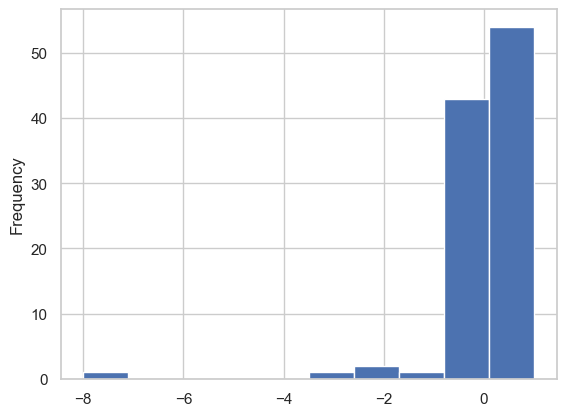

In [ ]:
error_ratio.plot.hist()

an error ratio of 0 to 0.5 mean the predicted medals were within a 50% actual medal count (predited 3 instead of 2 or 1 instead of 2)

in some cases the ratio goes above 7 (prediction 7 times above or below the true medal count)


so what we can do is to choose for which country we want to bet our medals, for some the rror ratio is pretty good (USA, 6% of the true medal count) but for others it is bad (Mexico, 300% diff between the predicted and the true medal count)

In [ ]:
error_ratio.sort_values(ascending=True)

team
TTO   -8.000000
SGP   -3.000000
MEX   -2.111111
KSA   -2.000000
TJK   -1.000000
         ...   
MKD    1.000000
GHA    1.000000
IOA    1.000000
KGZ    1.000000
SMR    1.000000
Length: 102, dtype: float64

Our model makes good prediction for countries that tend to earn a lot of medals, but for the others not so good :(

to do now to increase the performance of the model,
1) add more predictors
2) try other models
3) the relationship is not linear we could transform the athletes (log)


best solution in my opinion keep this model for good perfoming countries and develop another for lower performing countries taking into account more predictors

NOW WE TIME SERIES THE ERRORS

In [ ]:
#we create a new regression this time using all years until 2021 since we know the regression is accurate

errors = teams[(teams["year"] < 2024)].copy()


reg = LinearRegression()
reg.fit(errors[predictors], errors["percentage_medals_won_year"])

# Predict on the errors set
errors["predictions"] = reg.predict(errors[predictors]) / 100 * errors["total_medals_year"]
errors.loc[errors["predictions"] < 0, "predictions"] = 0
errors["predictions"] = errors["predictions"].round()

# Calculate the percentage difference between predictions and actual medals
errors['percentage_difference'] = ((errors['predictions'] - errors['medals']) / errors['medals']) * 100

# Display the updated DataFrame with the percentage difference column
print(errors[errors["team"].isin(["SUI", "NZL", "FRA", "USA", "ITA", "GER"])][['team', 'year', 'medals', 'predictions', 'percentage_difference']])


     team  year  medals  predictions  percentage_difference
642   FRA  1964      31         18.0             -41.935484
643   FRA  1968      27         40.0              48.148148
644   FRA  1972      22         37.0              68.181818
645   FRA  1976      20         34.0              70.000000
646   FRA  1980      29         32.0              10.344828
...   ...   ...     ...          ...                    ...
2121  GER  2021      89        148.0              66.292135
2123  FRA  2021      79         98.0              24.050633
2125  ITA  2021      96         78.0             -18.750000
2132  NZL  2021      48         34.0             -29.166667
2146  SUI  2021      13         10.0             -23.076923

[83 rows x 5 columns]


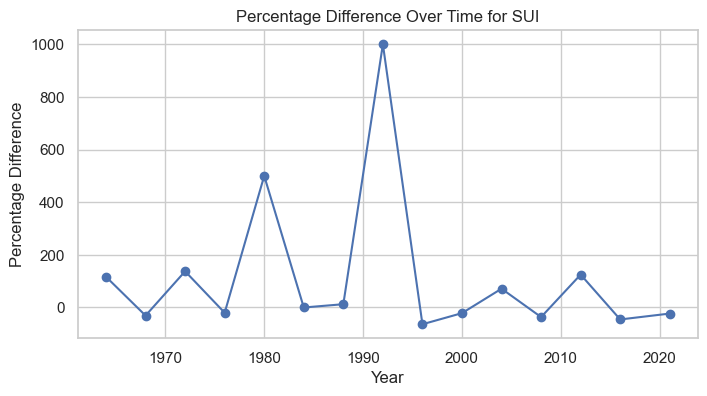

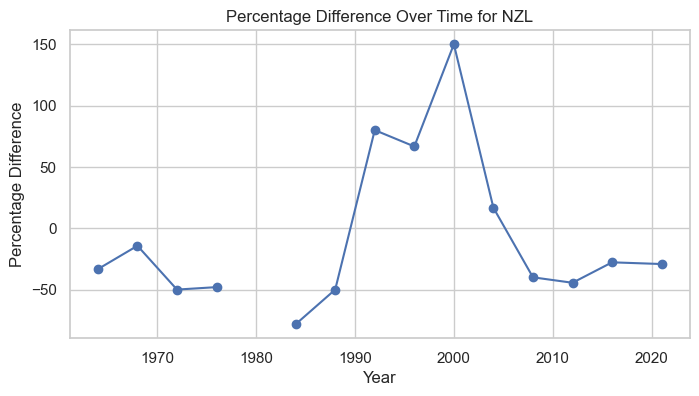

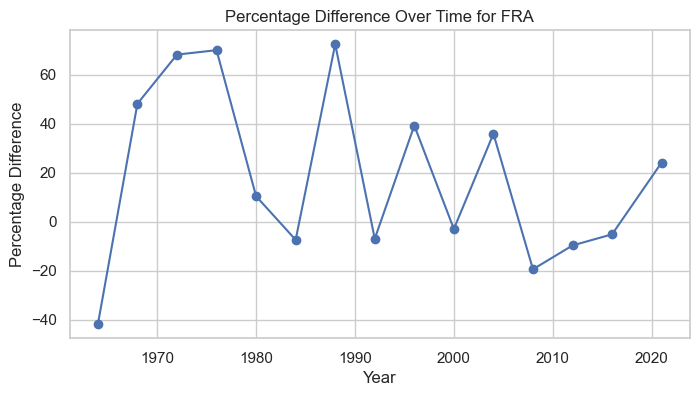

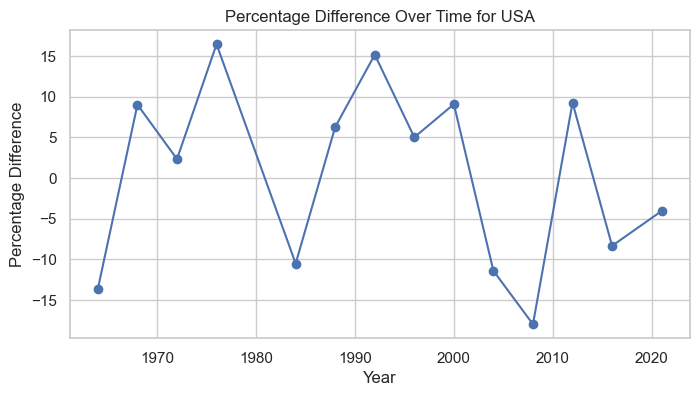

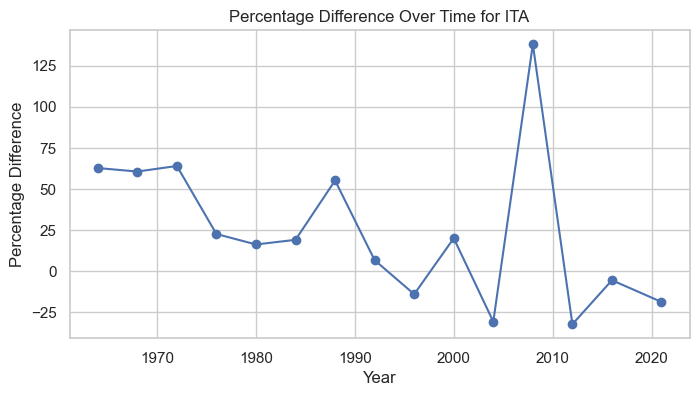

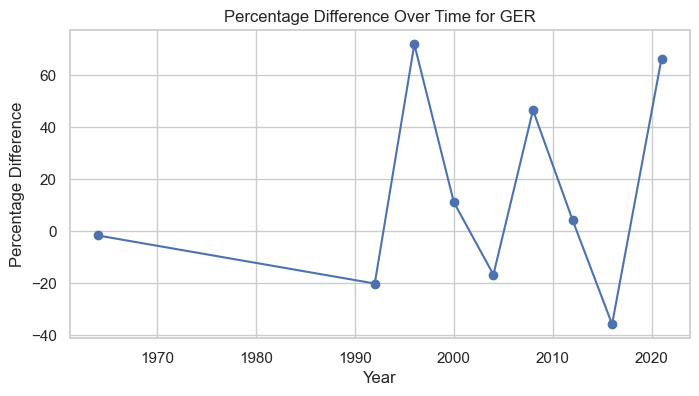

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional, for improved plot aesthetics

# Assuming 'errors' is your DataFrame with the percentage difference
# Assuming 'team' is the column representing the country
# Assuming 'year' is the column representing the year
# Assuming 'percentage_difference' is the column with the calculated percentage difference

# Select countries of interest
countries_of_interest = ["SUI", "NZL", "FRA", "USA", "ITA", "GER"]

# Filter the DataFrame for the selected countries
selected_countries_df = errors[errors["team"].isin(countries_of_interest)]

# Plotting individually for each country
sns.set(style="whitegrid")  # Optional, for improved plot aesthetics

for country in countries_of_interest:
    country_data = selected_countries_df[selected_countries_df["team"] == country]

    plt.figure(figsize=(8, 4))
    plt.plot(country_data["year"], country_data["percentage_difference"], marker='o')
    plt.title(f"Percentage Difference Over Time for {country}")
    plt.xlabel("Year")
    plt.ylabel("Percentage Difference")
    plt.show()


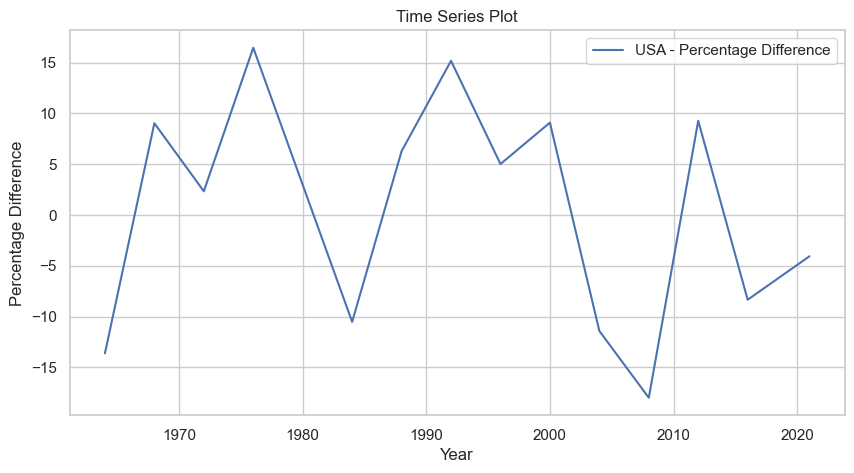

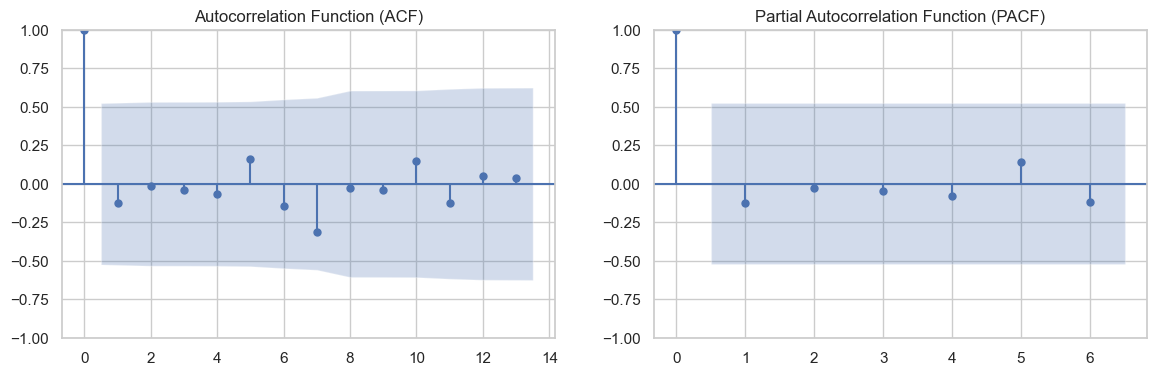

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'errors' is your DataFrame with the time series data
# Assuming 'team' is the column representing the country
# Assuming 'year' is the column representing the year
# Assuming 'percentage_difference' is the column with the calculated percentage difference

# Select a specific country
selected_country = "USA"
country_data = errors[errors["team"] == selected_country]

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(country_data["year"], country_data["percentage_difference"], label=f"{selected_country} - Percentage Difference")
plt.title("Time Series Plot")
plt.xlabel("Year")
plt.ylabel("Percentage Difference")
plt.legend()
plt.show()

# ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# Set lags to the maximum value based on the length of the data
max_lags = min(30, len(country_data["percentage_difference"].dropna()) - 1)

# Plot ACF
sm.graphics.tsa.plot_acf(country_data["percentage_difference"].dropna(), lags=max_lags, ax=ax1)
ax1.set_title("Autocorrelation Function (ACF)")

# Reduce the number of lags for the PACF plot
max_pacf_lags = min(6, len(country_data["percentage_difference"].dropna()) - 1)

# Plot PACF
sm.graphics.tsa.plot_pacf(country_data["percentage_difference"].dropna(), lags=max_pacf_lags, ax=ax2)
ax2.set_title("Partial Autocorrelation Function (PACF)")

plt.show()



Now we predict for 2024

!!!!!!! I ASSUMED THE NB OF ATHLETES SENT AND A TOTAL MEDAL COUNT OF 1080 !!!!!!!!!

In [ ]:
predictions = reg.predict(pred[predictors])
pred["predictions"]=predictions/100*pred["total_medals_year"]

pred.loc[pred["predictions"] < 0, "predictions"] = 0
pred["predictions"] = pred["predictions"].round()
pred

,team,country,year,percentage_athletes_sent,percentage_athletes_sent_sqrd,percentage_prev_medals,percentage_medals_won_year,host,total_medals_year,medals,predictions
2323,USA,United States,2024,5.342422,28.541476,12.910910,0.0,0,1080,0,131.0
2324,JPN,Japan,2024,3.677869,13.526723,6.622201,0.0,0,1080,0,66.0
2325,AUS,Australia,2024,3.987001,15.896174,5.240591,0.0,0,1080,0,58.0
2326,GER,Germany,2024,3.883957,15.085121,4.240114,0.0,0,1080,0,50.0
2327,CHN,China,2024,3.654090,13.352374,10.195331,0.0,0,1080,0,93.0
...,...,...,...,...,...,...,...,...,...,...,...
2522,MTN,Mauritania,2024,0.015853,0.000251,0.000000,0.0,0,1080,0,0.0
2523,NRU,Nauru,2024,0.015853,0.000251,0.000000,0.0,0,1080,0,0.0
2525,SKN,Saint Kitts and Nevis,2024,0.047559,0.002262,0.000000,0.0,0,1080,0,0.0
2526,SSD,South Sudan,2024,0.095117,0.009047,0.000000,0.0,0,1080,0,0.0


In [ ]:
pred[pred["team"].isin(["SUI", "NZL", "FRA", "USA", "ITA","GER"])]


,team,country,year,percentage_athletes_sent,percentage_athletes_sent_sqrd,percentage_prev_medals,percentage_medals_won_year,host,total_medals_year,medals,predictions
2323,USA,United States,2024,5.342422,28.541476,12.910910,0.0,0,1080,0,131.0
2326,GER,Germany,2024,3.883957,15.085121,4.240114,0.0,0,1080,0,50.0
2328,FRA,France,2024,3.527267,12.441612,3.763697,0.0,1,1080,0,46.0
2330,ITA,Italy,2024,3.067533,9.409760,4.573606,0.0,0,1080,0,46.0
2337,NZL,New Zealand,2024,1.712112,2.931326,2.286803,0.0,0,1080,0,21.0
2351,SUI,Switzerland,2024,0.927394,0.860059,0.619343,0.0,0,1080,0,6.0
